In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [137]:
merged_df = pd.read_excel("../Data/MergedData.xlsx")

In [138]:
columns = merged_df.columns
columns

Index(['Unnamed: 0', 'Country', 'Region', 'Ladder', 'Social Support',
       'Freedom', 'Trust', 'Generosity', 'GDP per Capita',
       'Healthy Life Expectancy', 'Population Density', 'Birth Rate',
       'Obesity Rate (%)', 'Unemployment Rate (%)', 'Ladder rank',
       'Social Support rank', 'Freedom rank', 'Trust rank', 'Generosity rank',
       'GDP per Capita rank', 'Healthy Life Expectancy rank',
       'Population Density rank', 'Birth Rate rank', 'Obesity Rate (%) rank',
       'Unemployment Rate (%) rank'],
      dtype='object')

In [139]:
#Make a cleaner df: just the happiness column and 10 factors rank columns
clean_df = pd.DataFrame({"Country":merged_df["Country"],
                         "Region":merged_df["Region"],
                         "Happiness":merged_df["Ladder rank"],
                         "Social Support":merged_df["Social Support rank"],
                         "Freedom":merged_df["Freedom rank"],
                         "Trust":merged_df["Trust rank"],
                         "Generosity":merged_df["Generosity rank"],
                         "GDP per Capita":merged_df["GDP per Capita rank"],
                         "Healthy Life Expectancy":merged_df["Healthy Life Expectancy rank"],
                         "Population Density":merged_df["Population Density rank"],
                         "Birth Rate":merged_df["Birth Rate rank"],                        
                         "Obesity Rate":merged_df["Obesity Rate (%) rank"],
                         "Unemployment Rate":merged_df["Unemployment Rate (%) rank"],
                        })
clean_df

,Country,Region,Happiness,Social Support,Freedom,Trust,Generosity,GDP per Capita,Healthy Life Expectancy,Population Density,Birth Rate,Obesity Rate,Unemployment Rate
0,burkina faso,Sub-Saharan Africa,95,96,106,38,102,116,118,56,115,112,1
1,senegal,Sub-Saharan Africa,92,88,101,72,106,106,97,60,109,96,2
2,haiti,Latin America and Caribbean,119,120,124,39,17,117,111,117,94,42,3
3,kenya,Sub-Saharan Africa,100,102,61,87,22,103,94,65,95,105,4
4,namibia,Sub-Saharan Africa,93,63,70,81,116,76,108,3,98,80,5
5,libya,Middle East and Northern Africa,62,65,67,25,71,53,85,7,63,2,6
6,gabon,Sub-Saharan Africa,86,80,99,85,117,51,96,10,102,86,7
7,south africa,Sub-Saharan Africa,88,57,72,84,73,66,109,39,78,12,8
8,venezuela,Latin America and Caribbean,90,46,117,91,114,67,61,33,81,26,9
9,yemen,Middle East and Northern Africa,122,83,119,67,125,118,110,47,101,81,10


In [140]:
#make a list of columns that need to make a scatter plot of
columns = clean_df.columns
columns = list(clean_df.columns)
columns.remove("Country")
columns.remove("Region")
columns.remove("Happiness")
columns

['Social Support',
 'Freedom',
 'Trust',
 'Generosity',
 'GDP per Capita',
 'Healthy Life Expectancy',
 'Population Density',
 'Birth Rate',
 'Obesity Rate',
 'Unemployment Rate']

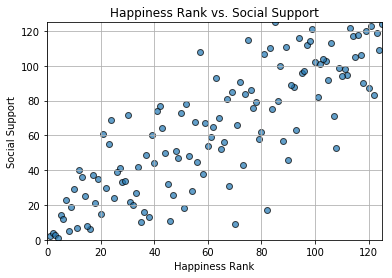

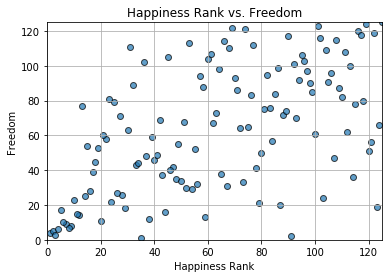

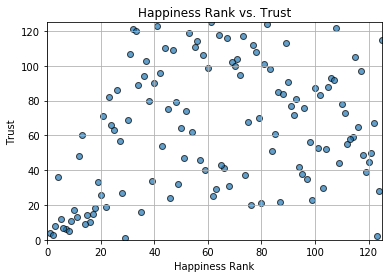

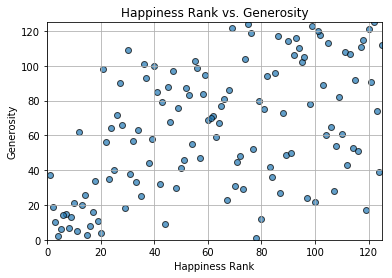

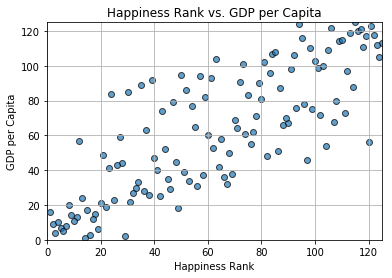

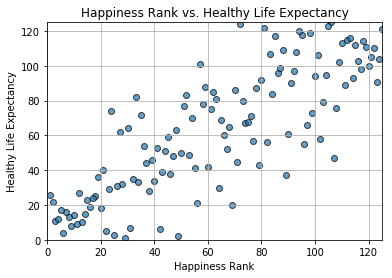

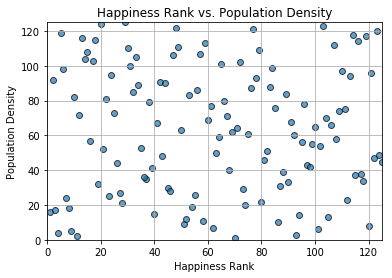

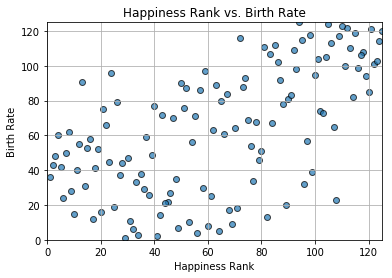

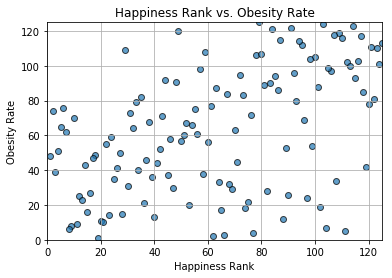

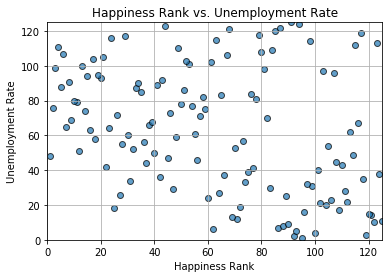

In [112]:
for factor in columns:
    plt.scatter(clean_df["Happiness"], clean_df[factor], edgecolor="black", alpha=0.7)
    plt.xlim(0,125)
    plt.ylim(0,125)
    plt.grid()

    plt.title(f"Happiness Rank vs. {factor}")
    plt.xlabel("Happiness Rank")
    plt.ylabel(factor)
    plt.savefig(f"../Paul Code/Happiness v {factor}.png")
    plt.show()

In [141]:
#make coefficients
coefficient_list = []
for factor in columns:
    coefficient = np.corrcoef(clean_df["Happiness"], clean_df[factor])
    coefficient_list.append(coefficient[0][1])

In [142]:
coefficient_list

[0.8242764976958523,
 0.5593978494623655,
 0.2892165898617511,
 0.49423655913978487,
 0.8025437788018431,
 0.8132288786482332,
 -0.013714285714285714,
 0.5984331797235022,
 0.47897388632872495,
 -0.328294930875576]

In [143]:
#add data for temperature from Seunghwa's work:
columns.append("Temperature")
coefficient_list.append(0.06820241)

In [144]:
#creating a table of coefficients to show which are most correlated
coeff_pd = pd.DataFrame({"Factor":columns,"Coefficient":coefficient_list})
coeff_pd=coeff_pd.sort_values("Coefficient", axis = 0, ascending = True)
coeff_pd

,Factor,Coefficient
9,Unemployment Rate,-0.328295
6,Population Density,-0.013714
10,Temperature,0.068202
2,Trust,0.289217
8,Obesity Rate,0.478974
3,Generosity,0.494237
1,Freedom,0.559398
7,Birth Rate,0.598433
4,GDP per Capita,0.802544
5,Healthy Life Expectancy,0.813229


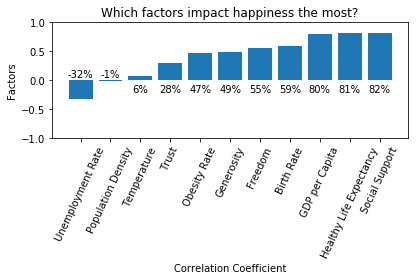

In [149]:
#Create bar graph of coefficients
summarybar = plt.bar(coeff_pd["Factor"],coeff_pd["Coefficient"])
plt.xlabel("Correlation Coefficient")
plt.ylabel("Factors")
plt.title("Which factors impact happiness the most?")
plt.ylim(-1,1)
plt.xticks(coeff_pd["Factor"],rotation=65)

for bar in summarybar:
    height = bar.get_height()
    if height > 0:
        label_position=-0.25
    else:
        label_position = 0.01
    plt.text(bar.get_x()+bar.get_width()/2.,label_position,
            '%d' % int(height*100)+'%',color='black',
            ha='center',va='bottom')

plt.tight_layout()
plt.savefig(f"../Paul Code/Factors bar graph.png")

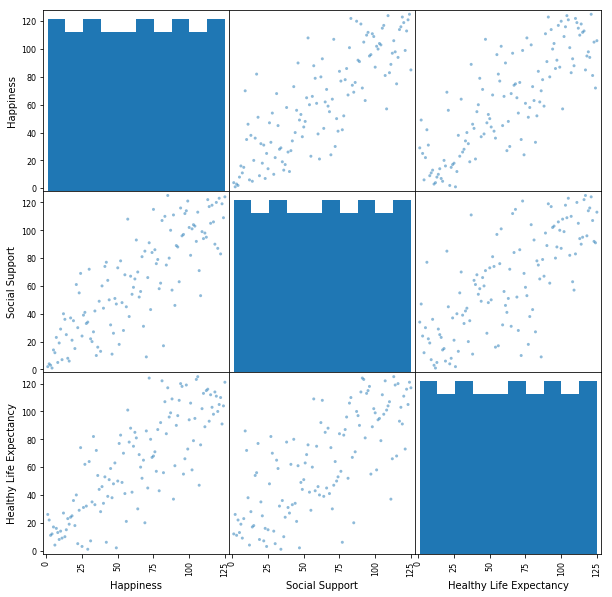

In [135]:
#creating a scatter matrix for happiness, social support, and healthy life expectancy
scatter_matrix(clean_df[["Happiness","Social Support","Healthy Life Expectancy"]],figsize=(10, 10))
plt.savefig(f"../Paul Code/Scatter Matrix.png")